## good old multi-layer perceptron (MLP) from scratch

tiny toy problem, no test data, one hidden layer, square loss (solution of "mlp0")
- play with parameters
- monitor training error
- replace first sigmoid by ReLU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# main parameters
iterNum = 300
stepSizes = [0.01,0.1,1,10,100]
hiddenSize = 4

# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (2.0, 2.0)

bounded smooth non-linearity: 
$\sigma(x) = \frac{1}{1+\exp(-x)},\quad\sigma'(x) = \sigma(x)(1-\sigma(x))$

In [2]:
# compute sigmoid
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)

In [3]:
# input dataset
X = np.array([  [0,0,1,1],
                [0,1,0,1],
                [1,1,1,1] ])
trainNum = X.shape[1]

# output dataset            
Y = np.array([[0,1,1,0]])

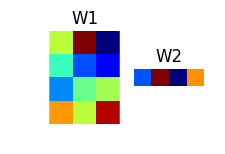

In [4]:
# initialize weights randomly with mean 0
np.random.seed(1)
W1 = 2 * np.random.random((hiddenSize,3)) - 1
W2 = 2 * np.random.random((1,hiddenSize)) - 1

# visualize weights
plt.subplot(121)
plt.imshow(W1,interpolation = 'none')
plt.axis('off')
plt.title('W1')
plt.subplot(122)
plt.imshow(W2,interpolation = 'none')
plt.axis('off')
plt.title('W2')

activation (no bias): $a_{\ell} = Wx_{\ell-1}$, output: $x_{\ell} = \sigma(a_{\ell})$  

square loss: $\frac{1}{2N} \sum_{n=1}^{N} \|x_2^{(n)}-y^{(n)}\|^2$

In [5]:
# training with full-batch fixed step-size gradient descent
for stepSize in stepSizes:
    for iter in range(iterNum):
    
        # forward propagation on all training data
        X0 = X
        A1 = np.dot(W1,X0)  
        X1 = sigmoid(A1)
        A2 = np.dot(W2,X1)
        X2 = sigmoid(A2)   
        
        # back propagation of errors
        G2 = X2 - Y
        H2  = G2 * sigmoid_output_to_derivative(X2)
        G1 = np.dot(W2.T,H2)
        H1 = G1 * sigmoid_output_to_derivative(X1)
    
        W2 -= stepSize * np.dot(H2,X1.T) / trainNum
        W1 -= stepSize * np.dot(H1,X0.T) / trainNum
    
    print("Prediction for step size :" + str(stepSize) + " : " )
    print(X2)

Prediction for step size :0.01 : 
[[ 0.46693509  0.44372128  0.49290942  0.47199768]]
Prediction for step size :0.1 : 
[[ 0.48749753  0.46884626  0.51438172  0.4961609 ]]
Prediction for step size :1 : 
[[ 0.45307008  0.49488068  0.524805    0.52743277]]
Prediction for step size :10 : 
[[ 0.04999666  0.94300372  0.95292847  0.05559892]]
Prediction for step size :100 : 
[[ 0.01127926  0.98756488  0.99067026  0.01075848]]
